### In this notebook you'll learn what a **neuron** is, how a **logisitc regression** can be represented as a neural network, what is an **activation function** and what are the different types we can use 

----------------------------------------------------------------------------------------------------------------------------------------

### A single Neuron

Before looking at artificial neurons, let's try to understand how an actual biological neuron works, compared to an artificial one (this is a very simplified explanation) 

**Biological Neuron:** A biological neuron is a cell in the nervous system that processes and transmits information. It consists of:

- Dendrites: Branch-like structures that receive signals from other neurons.
- Cell Body (Soma): The central part of the neuron that processes incoming signals.
- Axon: A long fiber that transmits the processed signal to other neurons.

**Artificial Neuron:** An artificial neuron is a mathematical model inspired by biological neurons. It has:

- Inputs (x₁, x₂, x₃): Represent features or signals from other neurons.
- Summation (Σ): The weighted sum of inputs.
- Activation Function: Applies a non-linear transformation to the sum (not explicitly shown in this simple model).
- Output (y): The result of the neuron's computation.




![try](assets/neuron_actual_vs_artificial.png "Title")

#### Weights and biases:
**Weights** are assigned to each connection between an input and an output neuron (w₁, w₂, w₃). They determine the strenght of the connection, or in other words, to what extend the combination of these input features affect the output.  

While weights determine the strength of connections between neurons, **biases** provide an additional layer of flexibility to neural networks. Biases are constants that serve as a form of offset allowing neurons to activate even when the weighted sum of their inputs is not sufficient on its own. Unlike weights, they are not related to inputs but are added to the neurons' outputs 





![wieghts_biases](assets/weights_biases.png "Title")

#### Numpy representation of a neuron 
Let's create a simple neuron with forward pass only

In [5]:
import numpy as np

class Neuron:
    def __init__(self, num_inputs):
        # Initialize weights randomly from a normal distribution
        self.weights = np.random.randn(num_inputs)
        # Initialize bias to zero
        self.bias = 0

    def sigmoid(self, x):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-x))

    def forward(self, inputs):
        # Ensure inputs is a numpy array
        inputs = np.array(inputs)
        
        # Calculate the weighted sum
        z = np.dot(self.weights, inputs) + self.bias
        
        # Apply the activation function
        return self.sigmoid(z)
    
neuron = Neuron(3)

inputs = np.array([1.0, 2.0, 3.0])
outputs = neuron.forward(inputs)
print(inputs)
print(outputs)


[1. 2. 3.]
0.9870110422657912


---------------------------------------------------------------------------------------------------------------------------------------------

### Neural network

A **neural network** consists of layers of neurons: an input layer, one or more hidden layers, and an output layer. By combining weighted inputs, the network learns how different features interact and influence the output.

![image](assets/Neural-Networks-Architecture.png)

#### A common example: Logistic regression as neural network
A logistic regression can be represented as a single-layer neural network with a **sigmoid activation function**.   

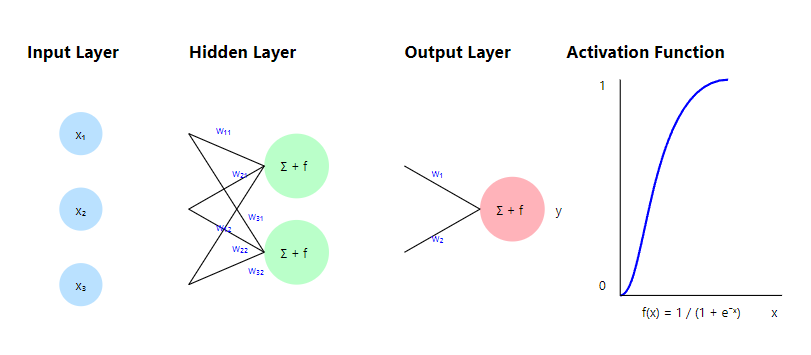

The **sigmoid function** maps any input to a value between 0 and 1.
- Formula: σ(z) = 1 / (1 + e⁻ˣ)
- Shape: An S-shaped curve that approaches 0 for large negative values and 1 for large positive values.  
| large z &rarr;  σ(z) $\approx$ 1  
| small z &rarr;  σ(z) $\approx$ 0

#### Logistic Regression Cost Function

Unlike linear regression, for logistic regression we don't use a squared error cost function since the optimization problem we're solving is **not** convex. This means it can have multiple local minima, making it difficult for gradient descent (optimizer) to find the global minimum.  

![image](assets/convex_vs_non_convex.png)


Cost function for a single training example:

$$J(\theta) = -[y \log(h_\theta(x)) + (1-y) \log(1-h_\theta(x))]$$

For a dataset of m training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))]$$

Where:
- $J(\theta)$ is the cost function
- $\theta$ represents the parameters (weights and bias)
- $h_\theta(x)$ is the logistic function (sigmoid) applied to the linear combination of inputs
- $y$ is the true label (0 or 1)
- $x$ is the input feature vector
- $m$ is the number of training examples

### Gradient Descent - the OG Optimization algorithm

#### Logistic regression from scartch using python

In [6]:

class LogisticRegressionNN:
    def __init__(self, input_size):
        self.weights = np.random.randn(input_size, 1)
        self.bias = np.zeros((1, 1))
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def forward(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def compute_cost(self, X, y):
        m = X.shape[0]
        h = self.forward(X)
        epsilon = 1e-15  # Small value to avoid log(0)
        cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1-y) * np.log(1-h + epsilon))
        return cost
    
    def compute_gradients(self, X, y):
        m = X.shape[0]
        h = self.forward(X)
        dw = (1/m) * np.dot(X.T, (h - y))
        db = (1/m) * np.sum(h - y)
        return dw, db
    
    def train(self, X, y, learning_rate=0.01, epochs=1000):
        for _ in range(epochs):
            dw, db = self.compute_gradients(X, y)
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db
    
    def predict(self, X, threshold=0.5):
        return (self.forward(X) >= threshold).astype(int)

if __name__ == "__main__":
    # Generate some sample data
    np.random.seed(0)
    X = np.random.randn(100, 2)
    y = ((X[:, 0] + X[:, 1]) > 0).astype(int).reshape(-1, 1)

    # Create and train the model
    model = LogisticRegressionNN(input_size=2)
    initial_cost = model.compute_cost(X, y)
    print(f"Initial cost: {initial_cost}")

    model.train(X, y)
    final_cost = model.compute_cost(X, y)
    print(f"Final cost: {final_cost}")

    # Make predictions
    predictions = model.predict(X)
    accuracy = np.mean(predictions == y)
    print(f"Accuracy: {accuracy}")

    # Test with new data
    X_new = np.array([[1, 2], [-1, -2]])
    predictions_new = model.predict(X_new)
    print(f"Predictions for new data: {predictions_new.flatten()}")


Initial cost: 0.893624983899058
Final cost: 0.28594944433966396
Accuracy: 0.98
Predictions for new data: [1 0]
